# IMPORT LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/CASIA2/Tp
!ls -l

Streaming output truncated to the last 5000 lines.
-rw------- 1 root root  307836 Dec 21  2009 Tp_D_CRN_M_N_arc00045_arc00046_10084.tif
-rw------- 1 root root  308140 Dec 21  2009 Tp_D_CRN_M_N_arc00045_arc00071_10087.tif
-rw------- 1 root root  309348 Dec 21  2009 Tp_D_CRN_M_N_arc00046_arc00045_10083.tif
-rw------- 1 root root   32549 Dec 21  2009 Tp_D_CRN_M_N_arc00054_cha00085_11922.jpg
-rw------- 1 root root  309016 Dec 21  2009 Tp_D_CRN_M_N_arc00071_arc00045_10085.tif
-rw------- 1 root root  759464 Dec 21  2009 Tp_D_CRN_M_N_arc00073_arc00072_10267.tif
-rw------- 1 root root  306672 Dec 21  2009 Tp_D_CRN_M_N_arc00088_arc00064_10394.tif
-rw------- 1 root root   56961 Dec 21  2009 Tp_D_CRN_M_N_art00012_art00013_11812.jpg
-rw------- 1 root root   51609 Dec 21  2009 Tp_D_CRN_M_N_art00014_art00013_11836.jpg
-rw------- 1 root root  307332 Dec 21  2009 Tp_D_CRN_M_N_art00058_art00049_10529.tif
-rw------- 1 root root   41864 Dec 21  2009 Tp_D_CRN_M_N_art00067_ani00093_11801.jpg
-rw------- 1 r

In [ ]:
import numpy as np

import numba
from numba import jit
import numba.cuda.api
import numba.cuda.cudadrv.libs
from numba import vectorize

import sys
import math

from sklearn import svm

import cmath
import scipy
from scipy import fftpack

import time
from PIL import Image
# from pysal.spatial_dynamics.markov import Markov
import cv2
from openpyxl import Workbook
import openpyxl
import os
# import pyquaternion
# from pyquaternion import Quaternion
from numpy.lib.stride_tricks import as_strided as ast
from itertools import product
from numpy.lib.stride_tricks import as_strided as ast
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install quaternions

In [ ]:
import cmath
import scipy
from numpy.lib.stride_tricks import as_strided as ast

In [ ]:
pip install pyquaternion

In [ ]:
from pyquaternion import Quaternion

In [ ]:
!pip install geopandas # Work with geometry in Pandas dataframes
!pip install descartes # Helps geopandas plot polygons
!pip install pysal
from pysal.spatial_dynamics.markov import Markov

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.8MB 284kB/s 
     |████████████████████████████████| 10.9MB 47.1MB/s 
     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 2.4MB 8.5MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 266kB 23.2MB/s 
     |████████████████████████████████| 5.7MB 17.8MB/s 
     |████████████████████████████████| 235kB 37.9MB/s 
     |████████████████████████████████| 2.7MB 45.3MB/s 
     |████████████████████████████████| 235kB 42.1MB/s 
     |████████████████████████████████| 55.7MB 64kB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
ERROR: Co

ModuleNotFoundError: ignored

In [ ]:
from scipy import fftpack

In [ ]:
!pip install pysal==1.14.3


     |████████████████████████████████| 17.8MB 1.2MB/s 
  Created wheel for pysal: filename=PySAL-1.14.3-py2.py3-none-any.whl size=18030909 sha256=1c4432d7f3adfe1ea71b957a7d8983981aa3ba679bc697433e8eb15db5574d19
  Stored in directory: /root/.cache/pip/wheels/fa/dd/19/2665a24ef25064d2717f2e04aa173cd7876298ef4578bf9777
Successfully built pysal


# To read an image

In [ ]:
from pysal.spatial_dynamics.markov import Markov

Dimensions of the IMAGE :  (256, 384, 3)


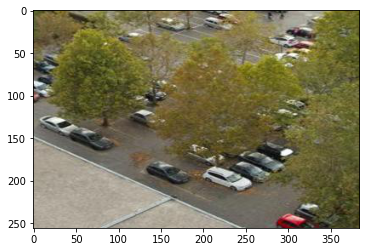

In [ ]:
rough=plt.imread("/content/drive/My Drive/copy-move/cp/Fcp500.jpg",1)
print('Dimensions of the IMAGE : ',rough.shape)
plt.imshow(rough)
plt.show()

In [ ]:
plt.imshow(images[1408])
plt.show()

NameError: ignored

#  To read images from a folder and make a list 

### os.path.join(path, *paths)
Join one or more path components intelligently. The return value is the concatenation of path and any members of *paths with exactly one directory separator (os.sep) following each non-empty part except the last, meaning that the result will only end in a separator if the last part is empty. If a component is an absolute path, all previous components are thrown away and joining continues from the absolute path component.

On Windows, the drive letter is not reset when an absolute path component (e.g., r'\foo') is encountered. If a component contains a drive letter, all previous components are thrown away and the drive letter is reset. Note that since there is a current directory for each drive, os.path.join("c:", "foo") represents a path relative to the current directory on drive C: (c:foo), not c:\foo.

In [ ]:
def load_images_from_folder(folder):
    image_list = []
    for filename in os.listdir(folder):
        img = plt.imread(os.path.join(folder,filename),1)
        if img is not None:
            image_list.append(img)
    return image_list
augmented_images = []
spliced_images = []
#augmented_folder = ""
spliced_folder = "/content/drive/My Drive/CASIA2/Tp"
#augmented_images = load_images_from_folder(augmented_folder)
spliced_images = load_images_from_folder(spliced_folder)
#images = augmented_images 
total_images = len(spliced_images)
# plt.imshow(images[0])
# plt.show()
total_images

5123

# Blocks division

In [ ]:
def norm_shape(shape):
    '''
    Normalize numpy array shapes so they're always expressed as a tuple, 
    even for one-dimensional shapes.

    Parameters
        shape - an int, or a tuple of ints

    Returns
        a shape tuple
    '''
    try:
        i = int(shape)
        return (i,)
    except TypeError:
        # shape was not a number
        pass

    try:
        t = tuple(shape)
        return t
    except TypeError:
        # shape was not iterable
        pass

    raise TypeError('shape must be an int, or a tuple of ints')


def sliding_window(a,ws,ss = None,flatten = True):
    '''
    Return a sliding window over a in any number of dimensions

    Parameters:
        a  - an n-dimensional numpy array
        ws - an int (a is 1D) or tuple (a is 2D or greater) representing the size 
             of each dimension of the window
        ss - an int (a is 1D) or tuple (a is 2D or greater) representing the 
             amount to slide the window in each dimension. If not specified, it
             defaults to ws.
        flatten - if True, all slices are flattened, otherwise, there is an 
                  extra dimension for each dimension of the input.

    Returns
        an array containing each n-dimensional window from a


    '''

    if None is ss:
        # ss was not provided. the windows will not overlap in any direction.
        ss = ws
    ws = norm_shape(ws)
    ss = norm_shape(ss)

    # convert ws, ss, and a.shape to numpy arrays so that we can do math in every 
    # dimension at once.
    ws = np.array(ws)
    ss = np.array(ss)
    shape = np.array(a.shape)


    # ensure that ws, ss, and a.shape all have the same number of dimensions
    ls = [len(shape),len(ws),len(ss)]
    if 1 != len(set(ls)):
        raise ValueError(\
        'a.shape, ws and ss must all have the same length. They were %s' % str(ls))

    # ensure that ws is smaller than a in every dimension
    if np.any(ws > shape):
        raise ValueError('ws cannot be larger than a in any dimension. a.shape was %s and ws was %s' % (str(a.shape),str(ws)))

    # how many slices will there be in each dimension?
    newshape = norm_shape(((shape - ws) // ss) + 1)
    # the shape of the strided array will be the number of slices in each dimension
    # plus the shape of the window (tuple addition)
    newshape += norm_shape(ws)
    # the strides tuple will be the array's strides multiplied by step size, plus
    # the array's strides (tuple addition)
    newstrides = norm_shape(np.array(a.strides) * ss) + a.strides
    strided = ast(a,shape = newshape,strides = newstrides)
    split_blocks=strided.reshape([strided.shape[0],strided.shape[1],strided.shape[3],strided.shape[4],strided.shape[5]])
    return split_blocks

    

In [ ]:
window_size = (8,8,3)
split_windows = sliding_window(rough, window_size)
print(split_windows.shape)
windows = split_windows.reshape([split_windows.shape[0]*split_windows.shape[1],split_windows.shape[2],split_windows.shape[3],split_windows.shape[4]])
print(windows.shape)

(32, 48, 8, 8, 3)
(1536, 8, 8, 3)


In [ ]:
number_of_blocks = windows.shape[0]
number_of_blocks

1536

BLOCK DIVISION OF ALL IMAGES

In [ ]:
def blockconversion(spliced_images):
    blocked_images = []
    window_size = (8,8,3)
    for i in range(0,total_images):
        blocked_image = sliding_window(spliced_images[i],window_size)
        blocked_image = blocked_image.reshape([blocked_image.shape[0]*blocked_image.shape[1],blocked_image.shape[2],blocked_image.shape[3],blocked_image.shape[4]])
        blocked_images.append(blocked_image)
    return blocked_images

blocked_img_list = blockconversion(spliced_images)
print(blocked_img_list[0].shape)  
len(blocked_img_list)

(2652, 8, 8, 3)


5123

# SEPARATING COLOR CHANNELS

In [ ]:
def separate_color_channels(target_image):
    blue_component = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]])
    red_component = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]])
    green_component = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]])
    for i in range(0,number_of_blocks):
        blue_component[i] , green_component[i] , red_component[i] = cv2.split(target_image[i])
    return (red_component,blue_component,green_component)
        
image_red_channel,image_blue_channel,image_green_Channel = separate_color_channels(blocked_img_list[0])            

In [ ]:
image_red_channel.shape

(1536, 8, 8)

# QUATERNION CONSTRUCTION FOR FULL IMAGE

In [ ]:
def quarternion_construction(target_image):
    full_image_quaternion =[]
    red_component , blue_component,green_component = separate_color_channels(target_image) 
    for block in range(0,number_of_blocks):
        lists = []
        for a in range(0,8):
            for b in range(0,8):
                quaternion_vector = Quaternion(0,red_component[block][a][b],green_component[block][a][b], blue_component[block][a][b])
        #print(quaternion_vector)
                lists.append(quaternion_vector)
        k= np.array(lists)
        my_quaternion=k.reshape(8,8)
        full_image_quaternion.append(my_quaternion) 
# my_quaternion
    full_image_quaternion=np.array(full_image_quaternion)
    full_image_quaternion = full_image_quaternion.reshape([windows.shape[0],windows.shape[1],windows.shape[2]])
    return full_image_quaternion

# QDCT FOR FULL IMAGE

In [ ]:
# def qdct_construction(target_image):
#     M = 8
#     N = 8
#     full_image_quaternion = quarternion_construction(target_image)
#     full_image_qdct = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]])
#     unit_pure_quaternion=Quaternion(0,1,0,0)
#     start = time.time()
#     for quat_block in range(0,windows.shape[0]):
#         qdct = [] 
#         for p in range(0,8):
#             for s in range(0,8):
#                 if (p == 0): 
#                     constant_p = 1 / math.sqrt(M)
#                 else:
#                     constant_p = math.sqrt(2) / math.sqrt(M) 
#                 if (s == 0): 
#                     constant_s = 1 / math.sqrt(N)
#                 else:
#                     constant_s = math.sqrt(2) / math.sqrt(N)
#                 summ = 0
#                 for m in range(0,8):
#                     for n in range(0,8): 
#                         summation = unit_pure_quaternion * full_image_quaternion[quat_block][m][n] * math.cos((2 * m + 1) * p * math.pi / (2 * M)) * math.cos((2 * n + 1) * s * math.pi / (2 * N)) 
#                         summ = summ + summation 
    
#                 qdct1 = constant_p*constant_s*summ
#                 magnitude_qdct = qdct1.magnitude
#                 absolute_qdct = round(magnitude_qdct,0)
#                 int_qdct = int(absolute_qdct)
# #         absolute_qdct = abs(magnitude_qdct)
#                 qdct.append(int_qdct)
#         print(quat_block)
        
#         j = np.array(qdct)
#         final_qdct=j.reshape(8,8)
#         full_image_qdct[quat_block] = final_qdct
#     print('time :',end-start)
#     end =time.time()
#     return full_image_qdct


In [ ]:
def qdct_construction(target_image):
    full_image_quaternion = quarternion_construction(target_image)
    
    A = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]],dtype=complex)
    B = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]],dtype=complex)

    unit_pure_quaternion = Quaternion(0,1,0,0)

    for quat_block in range(0,full_image_quaternion.shape[0]):
        for i in range(0,8):
            for j in range(0,8):
                A[quat_block][i][j] = complex(0,full_image_quaternion[quat_block][i][j][1])
                B[quat_block][i][j] = complex(full_image_quaternion[quat_block][i][j][2],full_image_quaternion[quat_block][i][j][3])

    A_dct = scipy.fftpack.dct(A)
    B_dct = scipy.fftpack.dct(B)
                
    A_quat = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]],dtype = Quaternion) 
    B_quat = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]],dtype = Quaternion) 
    for quat_block in range(0,full_image_quaternion.shape[0]):
        for i in range(0,8):
            for j in range(0,8):
                A_quat[quat_block][i][j] = Quaternion(0,A_dct[quat_block][i][j].imag,0,0) 
                B_quat[quat_block][i][j] = Quaternion(B_dct[quat_block][i][j].imag,B_dct[quat_block][i][j].imag,0,0) 
                
    full_image_qdct = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]],dtype = Quaternion) 
    for quat_block in range(0,full_image_quaternion.shape[0]):
        for i in range(0,8):
            for j in range(0,8):
                y = A_quat[quat_block][i][j] + (B_quat[quat_block][i][j] * Quaternion(0,0,1,0))
                z = y*unit_pure_quaternion
                magnitude_qdct = z.magnitude
                absolute_qdct = round(magnitude_qdct,0)
                int_qdct = int(absolute_qdct)
                full_image_qdct[quat_block][i][j] = int_qdct
#     print(full_image_qdct)
    return full_image_qdct

    

In [ ]:
# full_image_quaternion = quarternion_construction(blocked_img_list[0])
    
# A = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]],dtype=complex)
# B = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]],dtype=complex)

# unit_pure_quaternion = Quaternion(0,1,0,0)

# for quat_block in range(0,full_image_quaternion.shape[0]):
#     for i in range(0,8):
#         for j in range(0,8):
#             A[quat_block][i][j] = complex(0,full_image_quaternion[quat_block][i][j][1])
#             B[quat_block][i][j] = complex(full_image_quaternion[quat_block][i][j][2],full_image_quaternion[quat_block][i][j][3])

# A_dct = scipy.fftpack.dct(A)
# B_dct = scipy.fftpack.dct(B)
                
# A_quat = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]],dtype = Quaternion) 
# B_quat = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]],dtype = Quaternion) 
# for quat_block in range(0,full_image_quaternion.shape[0]):
#     for i in range(0,8):
#         for j in range(0,8):
#             A_quat[quat_block][i][j] = Quaternion(0,A_dct[quat_block][i][j].imag,0,0) 
#             B_quat[quat_block][i][j] = Quaternion(B_dct[quat_block][i][j].imag,B_dct[quat_block][i][j].imag,0,0) 
                

                
# full_image_qdct = np.ones([windows.shape[0],windows.shape[1],windows.shape[2]],dtype = Quaternion) 
# for quat_block in range(0,full_image_quaternion.shape[0]):
#     for i in range(0,8):
#         for j in range(0,8):
#             y = A_quat[quat_block][i][j] + (B_quat[quat_block][i][j] * Quaternion(0,0,1,0))
#             z = y*unit_pure_quaternion
#             magnitude_qdct = z.magnitude
#             absolute_qdct = round(magnitude_qdct,0)
#             int_qdct = int(absolute_qdct)
#             full_image_qdct[quat_block][i][j] = int_qdct
# full_image_qdct

    


# INTRA BLOCK HORIZONTAL DIFFERENCE MATRIX OF WHOLE IMAGE

In [ ]:
def intra_hor_function(target_image):
    full_image_intra_hor_mat = np.ones([windows.shape[0],8,7])
    t =4
    for block in range(0,windows.shape[0]):
        intra_hor_mat= np.ones([8,7])
        for u in range(0,8):
            for v in range(0,7):
                intra_hor_mat[u][v] =full_image_qdct[block][u][v] - full_image_qdct[block][u][v+1]
                if intra_hor_mat[u][v] >= t:
                    intra_hor_mat[u][v] = t
                elif intra_hor_mat[u][v] < -t:
                    intra_hor_mat[u][v] = -t
                else:
                    pass
        full_image_intra_hor_mat[block] =intra_hor_mat
    full_image_intra_hor_mat = full_image_intra_hor_mat.reshape(full_image_intra_hor_mat.shape[0]*full_image_intra_hor_mat.shape[1],full_image_intra_hor_mat.shape[2])
    return full_image_intra_hor_mat

 # INTRA VERTICAL MATRIX FULL IMAGE

In [ ]:
def intra_ver_function(target_image):
    full_image_intra_ver_mat = np.ones([windows.shape[0],7,8])
    t =4
    for block in range(0,windows.shape[0]):
        intra_ver_mat= np.ones([7,8])
        for u in range(0,7):
            for v in range(0,8):
                intra_ver_mat[u][v] =full_image_qdct[block][u+1][v] - full_image_qdct[block][u][v]
                if intra_ver_mat[u][v] >= t:
                    intra_ver_mat[u][v] = t
                elif intra_ver_mat[u][v] < -t:
                    intra_ver_mat[u][v] = -t
                else:
                    pass
        full_image_intra_ver_mat[block] =intra_ver_mat 
    full_image_intra_ver_mat = full_image_intra_ver_mat.reshape(full_image_intra_ver_mat.shape[0]*full_image_intra_ver_mat.shape[1],full_image_intra_ver_mat.shape[2])
    return full_image_intra_ver_mat

# MAIN DIAGONAL INTRA BLOCK FOR FULL IMAGE

In [ ]:
def intra_main_function(target_image):
    full_image_intra_main_mat = np.ones([windows.shape[0],7,7])
    t =4
    for block in range(0,windows.shape[0]):
        intra_main_mat= np.ones([7,7])
        for u in range(0,7):
            for v in range(0,7):
                intra_main_mat[u][v] =full_image_qdct[block][u][v] - full_image_qdct[block][u+1][v+1]
                if intra_main_mat[u][v] >= t:
                    intra_main_mat[u][v] = t
                elif intra_main_mat[u][v] < -t:
                    intra_main_mat[u][v] = -t
                else:
                    pass
        full_image_intra_main_mat[block] =intra_main_mat 
    full_image_intra_main_mat = full_image_intra_main_mat.reshape(full_image_intra_main_mat.shape[0]*full_image_intra_main_mat.shape[1],full_image_intra_main_mat.shape[2])
    return full_image_intra_main_mat

# MINOR DIAGONAL INTRA BLOCK MATRIX FULL FULL IMAGE

In [ ]:
def intra_minor_function(target_image):
    full_image_intra_minor_mat = np.ones([windows.shape[0],7,7])
    t =4
    for block in range(0,windows.shape[0]):
        intra_minor_mat= np.ones([7,7])
        for u in range(0,7):
            for v in range(0,7):
                intra_minor_mat[u][v] =full_image_qdct[block][u][v+1] - full_image_qdct[block][u+1][v]
                if intra_minor_mat[u][v] >= t:
                    intra_minor_mat[u][v] = t
                elif intra_minor_mat[u][v] < -t:
                    intra_minor_mat[u][v] = -t
                else:
                    pass
        full_image_intra_minor_mat[block] =intra_minor_mat 
    full_image_intra_minor_mat = full_image_intra_minor_mat.reshape(full_image_intra_minor_mat.shape[0]*full_image_intra_minor_mat.shape[1],full_image_intra_minor_mat.shape[2])
    return full_image_intra_minor_mat

# INTER BLOCK HORIZONTAL MATRIX OF FULL IMAGE

In [ ]:
def inter_hor_function(target_image):
    full_image_inter_hor_mat = []
    t =4
    for block in range(0,(split_windows.shape[0])*split_windows.shape[1]):
        inter_hor_mat= np.ones([8,8])
        if (((block+1) % (split_windows.shape[1])) == 0):
            pass
        else:
            for u in range(0,8):
                for v in range(0,8):
                    inter_hor_mat[u][v] = full_image_qdct[block][u][v] - full_image_qdct[block+1][u][v]
                    if inter_hor_mat[u][v] >= t:
                        inter_hor_mat[u][v] = t
                    elif inter_hor_mat[u][v] < -t:
                        inter_hor_mat[u][v] = -t
                    else:
                        pass

            full_image_inter_hor_mat.append(inter_hor_mat)

    full_image_inter_hor_mat = np.array(full_image_inter_hor_mat)           
    full_image_inter_hor_mat = full_image_inter_hor_mat.reshape([(split_windows.shape[0])*(split_windows.shape[1]-1),8,8])
    full_image_inter_hor_mat = full_image_inter_hor_mat.reshape(full_image_inter_hor_mat.shape[0]*full_image_inter_hor_mat.shape[1],full_image_inter_hor_mat.shape[2])
    return full_image_inter_hor_mat

# INTER BLOCK VERTICAL MATRIX OF FULL IMAGE

In [ ]:
def inter_ver_function(target_image):
    full_image_inter_ver_mat = []
    t =4
    for block in range(0,(split_windows.shape[0])*split_windows.shape[1]):
        inter_ver_mat= np.ones([8,8])
        if (block >= (split_windows.shape[0]-1)*split_windows.shape[1] ):
            pass
        else:
            for u in range(0,8):
                for v in range(0,8):
                    inter_ver_mat[u][v] = full_image_qdct[block][u][v] - full_image_qdct[block+split_windows.shape[1]][u][v]
                    if inter_ver_mat[u][v] >= t:
                        inter_ver_mat[u][v] = t
                    elif inter_ver_mat[u][v] < -t:
                        inter_ver_mat[u][v] = -t
                    else:
                        pass
            full_image_inter_ver_mat.append(inter_ver_mat)
    full_image_inter_ver_mat = np.array(full_image_inter_ver_mat)           
    full_image_inter_ver_mat = full_image_inter_ver_mat.reshape([(split_windows.shape[0]-1)*(split_windows.shape[1]),8,8])
    full_image_inter_ver_mat = full_image_inter_ver_mat.reshape(full_image_inter_ver_mat.shape[0]*full_image_inter_ver_mat.shape[1],full_image_inter_ver_mat.shape[2])
    return full_image_inter_ver_mat

# INTER BLOCK MAJOR DIAGONAL MATRIX FOR FULL IMAGE

In [ ]:
def inter_main_function(target_image):
    full_image_inter_main_mat = []
    t =4
    for block in range(0,(split_windows.shape[0])*split_windows.shape[1]):
        inter_main_mat= np.ones([8,8])
        if ((block >= (split_windows.shape[0]-1)*split_windows.shape[1]) or (((block+1) % (split_windows.shape[1])) == 0)):
            pass
        else:
            for u in range(0,8):
                for v in range(0,8):
                    inter_main_mat[u][v] = full_image_qdct[block][u][v] - full_image_qdct[block+split_windows.shape[1]+1][u][v]
                    if inter_main_mat[u][v] >= t:
                        inter_main_mat[u][v] = t
                    elif inter_main_mat[u][v] < -t:
                        inter_main_mat[u][v] = -t
                    else:
                        pass
            full_image_inter_main_mat.append(inter_main_mat)
    full_image_inter_main_mat = np.array(full_image_inter_main_mat)           
    full_image_inter_main_mat = full_image_inter_main_mat.reshape([(split_windows.shape[0]-1)*(split_windows.shape[1]-1),8,8])
    full_image_inter_main_mat = full_image_inter_main_mat.reshape(full_image_inter_main_mat.shape[0]*full_image_inter_main_mat.shape[1],full_image_inter_main_mat.shape[2])
    return full_image_inter_main_mat

# INTER BLOCK MINOR DIAGONAL MATRIX FOR FULL IMAGE

In [ ]:
def inter_minor_function(target_image):
    full_image_inter_minor_mat = []
    t =4
    for block in range(0,(split_windows.shape[0])*split_windows.shape[1]):
        inter_minor_mat= np.ones([8,8])
        if ((block >= (split_windows.shape[0]-1)*split_windows.shape[1]) or (((block) % (split_windows.shape[1])) == 0)):
            pass
        else:
            for u in range(0,8):
                for v in range(0,8):
                    inter_minor_mat[u][v] = full_image_qdct[block][u][v] - full_image_qdct[block+split_windows.shape[1]-1][u][v]
                    if inter_minor_mat[u][v] >= t:
                        inter_minor_mat[u][v] = t
                    elif inter_minor_mat[u][v] < -t:
                        inter_minor_mat[u][v] = -t
                    else:
                        pass
            full_image_inter_minor_mat.append(inter_minor_mat)
    full_image_inter_minor_mat = np.array(full_image_inter_minor_mat)           
    full_image_inter_minor_mat = full_image_inter_minor_mat.reshape([(split_windows.shape[0]-1)*(split_windows.shape[1]-1),8,8])
    full_image_inter_minor_mat= full_image_inter_minor_mat.reshape(full_image_inter_minor_mat.shape[0]*full_image_inter_minor_mat.shape[1],full_image_inter_minor_mat.shape[2])
    return full_image_inter_minor_mat

# TRANSITION PROBABILITIES OF IMAGE

In [ ]:
def transition_function(target_image):
    trans_prob = []
    trans_prob_full_image = []
    states = np.array([-4,-3,-2,-1,0,1,2,3,4]).reshape(9,1)
    full_image_intra_hor_mat = intra_hor_function(target_image)
    full_image_intra_ver_mat = intra_ver_function(target_image)
    full_image_intra_main_mat = intra_main_function(target_image)
    full_image_intra_minor_mat = intra_minor_function(target_image)
    
    full_image_inter_hor_mat = inter_hor_function(target_image)
    full_image_inter_ver_mat = inter_ver_function(target_image)
    full_image_inter_main_mat = inter_main_function(target_image)
    full_image_inter_minor_mat = inter_minor_function(target_image)
    
    
    intra_hor_markov= Markov(full_image_intra_hor_mat,classes=states)
    trans_prob.append(intra_hor_markov.p)
    
    intra_ver_markov = Markov(full_image_intra_ver_mat,classes=states)
    trans_prob.append(intra_ver_markov.p)
    
    intra_main_markov= Markov(full_image_intra_main_mat,classes=states)
    trans_prob.append(intra_main_markov.p)

    intra_minor_markov= Markov(full_image_intra_minor_mat,classes=states)
    trans_prob.append(intra_minor_markov.p)

    inter_hor_markov= Markov(full_image_inter_hor_mat,classes=states)
    trans_prob.append(inter_hor_markov.p)
    
    inter_ver_markov= Markov(full_image_inter_ver_mat,classes=states)
    trans_prob.append(inter_ver_markov.p)
 
    inter_main_markov= Markov(full_image_inter_main_mat,classes=states)
    trans_prob.append(inter_main_markov.p)

    inter_minor_markov= Markov(full_image_inter_minor_mat,classes=states)
    trans_prob.append(inter_minor_markov.p)
    
    for i in range(0,8):
        trans_prob_full_image.append(trans_prob[i])

    trans_prob_full_image = np.array(trans_prob_full_image)
    trans_prob_full_image = trans_prob_full_image.reshape(1,8*9*9)
      
    return trans_prob_full_image

# whole dataset processing

In [ ]:
start1 = time.time()
#augmented_folder = 'databases\CASIA1\Au'
#augmented_images = load_images_from_folder(augmented_folder)
spliced_folder = "/content/drive/My Drive/CASIA2/Tp"
spliced_images = load_images_from_folder(spliced_folder)
#images = augmented_images 
#images = images+spliced_images
total_images = len(spliced_images)
print('total images: ',total_images)
full_data = []

blocked_img_list = blockconversion(spliced_images)
wb = Workbook()
ws = wb.active
for i in range(0,total_images):
    print(i)
    full_image_qdct = qdct_construction(blocked_img_list[i])
    trans_prob_full_image =   transition_function(blocked_img_list[i])
    if (i < 5000):
        full_data.append([list(trans_prob_full_image),1])
    else:
        full_data.append([list(trans_prob_full_image),0])
    for col in range(0, (trans_prob_full_image.shape[1]+1)):
        o = ws.cell(row = i+1, column = col+1)
        if (col<trans_prob_full_image.shape[1]):
            o.value= full_data[i][0][0][col]
        else :
            o.value=full_data[i][1]
    wb.save("/content/drive/My Drive/fcp_featuredata_labels.xlsx")
end1 = time.time()


total images:  5123
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246


IndexError: ignored

In [ ]:
wb = Workbook()
ws = wb.active
for i in range(1000,total_images):
    print(i)
    full_image_qdct = qdct_construction(blocked_img_list[i])
    trans_prob_full_image =   transition_function(blocked_img_list[i])
    if (i < 1000):
        full_data.append([list(trans_prob_full_image),1])
    else:
        full_data.append([list(trans_prob_full_image),0])
    for col in range(0, (trans_prob_full_image.shape[1]+1)):
        o = ws.cell(row = i+1, column = col+1)
        if (col<trans_prob_full_image.shape[1]):
            o.value= full_data[i][0][0][col]
        else :
            o.value=full_data[i][1]
    wb.save("/content/drive/My Drive/TP_full_featuredata_labels.xlsx")

In [ ]:
wb = Workbook()
ws = wb.active
for i in range(1409,total_images):
    print(i)
    full_image_qdct = qdct_construction(blocked_img_list[i])
    trans_prob_full_image =   transition_function(blocked_img_list[i])
    if (i < 800):
        full_data.append([list(trans_prob_full_image),1])
    else:
        full_data.append([list(trans_prob_full_image),0])
    for col in range(0, (trans_prob_full_image.shape[1]+1)):
        o = ws.cell(row = i+1, column = col+1)
        if (col<trans_prob_full_image.shape[1]):
            o.value= full_data[i][0][0][col]
        else :
            o.value=full_data[i][1]
    wb.save("/content/drive/My Drive/full_featuredata_labels.xlsx")

In [ ]:
full_data = np.array(full_data)

In [ ]:
full_data.shape

(1000, 2)

In [ ]:
full_data[0][1]

1

In [ ]:
wb = Workbook()
ws = wb.active
row = 0
for list_item in range(0,1000):
    for col in range(0,  (trans_prob_full_image.shape[1]+1)):
        o = ws.cell(row = list_item+1, column = col+1)
        if (col<trans_prob_full_image.shape[1]):
            o.value= full_data[list_item][0][0][col]
        else :
            o.value=full_data[list_item][1]
wb.save("/content/drive/My Drive/cp_final_data.xlsx")

### READ DATA FROM EXCEL

# New section

In [ ]:
# full_data_excel = []
# path = "final_data.xlsx"


# wb_obj = openpyxl.load_workbook(path) 
  

# sheet_obj = wb_obj.active 
# total_img_excel = sheet_obj.max_row
# total_col_excel = sheet_obj.max_column
# row = 0
# for list_item in range(0,total_img_excel):
#     row_list_excel = []
#     for col in range(0,  total_col_excel):
#         o = sheet_obj.cell(row = list_item+1, column = col+1)
#         if (col<(total_col_excel-1)):
#             row_list_excel.append(o.value)
#         else :
#             label = o.value
#     full_data_excel.append([row_list_excel,label])


In [ ]:
full_data_excel = np.ones([1721,648])
full_target_excel = []
path = "final_data.xlsx"


wb_obj = openpyxl.load_workbook(path) 
  

sheet_obj = wb_obj.active 
total_img_excel = sheet_obj.max_row
total_col_excel = sheet_obj.max_column
row = 0
for list_item in range(0,total_img_excel):
    for col in range(0,  total_col_excel):
        o = sheet_obj.cell(row = list_item+1, column = col+1)
        if (col<(total_col_excel-1)):
            full_data_excel[list_item][col] = o.value
        else :
            full_target_excel.append(o.value)
    

In [ ]:
full_data_excel.shape

In [ ]:
full_target_excel = np.array(full_target_excel)
full_target_excel.shape

### cross validation

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm



In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(full_data_excel, full_target_excel, test_size=0.2, random_state=0)

X_train.shape, y_train.shape


In [ ]:
X_test.shape, y_test.shape

In [ ]:
clf = svm.SVC(kernel='poly', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)                           

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA()

In [ ]:
pca.fit(X_train)

In [ ]:
pca.n_components_

In [ ]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test) 

In [ ]:
start = time.time()
spliced_folder ='databases\CASIA1\Sp'
spliced_images = load_images_from_folder(spliced_folder)
images = spliced_images 
total_images = len(images)

blocked_img_list = blockconversion(images)
full_image_qdct = qdct_construction(blocked_img_list[0])
end = time.time()
print('time :         ;;;;;;;;  : ',end - start)
trans_prob_full_image  =   transition_function(blocked_img_list[0])
# wb = Workbook()

# # grab the active worksheet
# ws = wb.active 
# o = ws.cell(row = 1, column = 1)
# o.value=trans_prob_full_image
# k = ws.cell(row = 1, column = 2)
# k.value = 1
         
# ws['A1'] = 42
# value="{0}".format(get_column_letter(col))

# Save the file
# wb.save("example.xlsx")